In [1]:
from sqlalchemy import create_engine
import pandas as pd

In [2]:
db_name = "timescale"
db_user = "admin"
db_password = "TimescalePassword"
db_host = "localhost"
db_port = "5433"
database_uri = f"postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}"
engine = create_engine(database_uri)
data = pd.read_sql("SELECT * FROM filteredsensordatagrid", engine)

In [3]:
asiakas_lkm = data['viikonpaiva'].value_counts().sort_index()
asiakas_lkm.index = ["Maanantai", "Tiistai", "Keskiviikko", "Torstai", "Perjantai", "Lauantai", "Sunnuntai"]

asiakas_lkm
# perustuu olemassa olevaan dataan, ei ennustele mitään.

Maanantai      260
Tiistai        199
Keskiviikko    171
Torstai        196
Perjantai      245
Lauantai       190
Sunnuntai      200
Name: count, dtype: int64

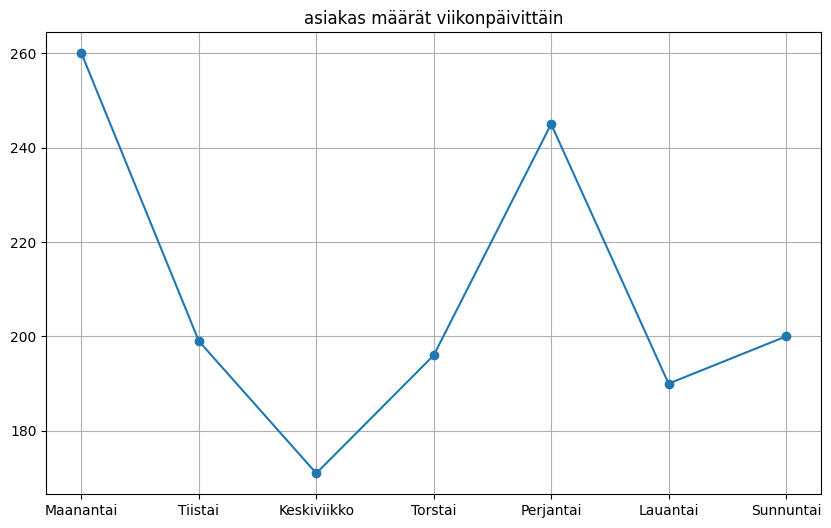

In [4]:
import matplotlib.pyplot as plt

days = asiakas_lkm.index
counts = asiakas_lkm.values
plt.figure(figsize=(10, 6))
plt.plot(days, counts, marker='o')

plt.title('asiakas määrät viikonpäivittäin')
plt.grid(True)
plt.show()